# Criando os Nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [3]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
121,LIVIA,0,135979,122,F
132,GABRIELE,0,122545,133,F
52,LUZIA,0,258278,53,F
95,ANDREA,0,174949,96,F
49,ANGELA,0,278058,50,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
90,FABIANO,0,157812,91,M
142,HUGO,0,100685,143,M
72,GILBERTO,0,212736,73,M
71,BENEDITO,0,213323,72,M
47,JULIO,0,334254,48,M


In [6]:
print(f'Quantidade de nomes: {len(nomes_f) + len(nomes_m)}')

Quantidade de nomes: 400


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
type(frames)

list

In [9]:
#aqui está concantenando os dois frames e selecionando somente a coluna "nome" e gerando um novo dtframe
nomes = pd.concat(frames, ignore_index = True)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


# Incluindo ID dos alunos

In [10]:
import numpy as np
np.random.seed(123)

In [11]:
total_alunos = len(nomes)
total_alunos

400

In [12]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
203,FRANCISCO,382
382,CHARLES,33
230,ANDERSON,111


In [14]:
#definindo emails aleatóriamente a partir de uma lista utilizando o método choise
dominios = ["@dominiodoemail.com.br","@servicodoemail.com"]
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio
284,SEVERINO,78,@dominiodoemail.com.br
200,JOSE,331,@servicodoemail.com
379,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
314,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela cursos

In [18]:
!pip3 install html5lib
!pip3 install lxml

In [19]:
#código que  para puxar os dados de uma página html
#import html5lib
#url = 'http://tabela-cursos.herokuapp.com/'
#pd.read_html(url)

In [20]:
lista = ['Lógica de programação', 'Java para Web', 'C# para Web', 'Ruby on Rails', 'Cursos de Python', 'PHP com MySql', 'NET para web', 'Novas integrações com Java', 'TDD com Java', 'Código limpo com C#', 'Preparatório para certificação Java', 'Hardware básico', 'Persistência com .NET', 'Desenvolvendo jogos', 'Análise de dados', 'Estatística básica', 'Internet das coisas', 'Programação funcional', 'Boas práticas em Java', 'Orientação objetos com Java'] 
cursos = pd.DataFrame(lista, columns = ['Nome do Curso']) 
cursos

,Nome do Curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [21]:
type(cursos)

pandas.core.frame.DataFrame

In [22]:
cursos.head(5)

,Nome do Curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [23]:
# Renomeando coluna do dataframe
cursos = cursos.rename(columns={"Nome do Curso":'nome_do_curso'})

In [24]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [25]:
#criando indice
cursos['id'] = cursos.index + 1

In [26]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [27]:
#setando coluna id como index principal do dataframe
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
330,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
270,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
371,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


# Matriculando os alunos nos cursos

In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br
344,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com
69,TEREZA,151,@servicodoemail.com,tereza@servicodoemail.com
305,PABLO,141,@dominiodoemail.com.br,pablo@dominiodoemail.com.br
309,CELSO,266,@servicodoemail.com,celso@servicodoemail.com


In [30]:
nomes['matriculas']  = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [31]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,347,@dominiodoemail.com.br,leticia@dominiodoemail.com.br,2
357,JAIME,214,@servicodoemail.com,jaime@servicodoemail.com,1
236,ROBERTO,364,@dominiodoemail.com.br,roberto@dominiodoemail.com.br,2


In [32]:
nomes.matriculas.describe()

count    400.000000
mean       2.110000
std        1.560123
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [33]:
import seaborn as sns

C:\Users\Yuri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

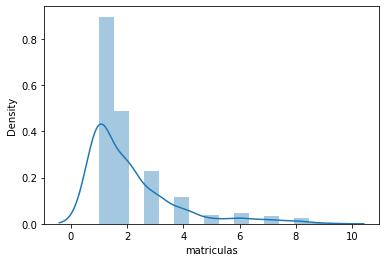

In [34]:
sns.distplot(nomes.matriculas)

In [35]:
nomes.matriculas.value_counts()

1    191
2    104
3     49
4     25
6     10
5      8
7      7
8      5
9      1
Name: matriculas, dtype: int64

In [36]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,7
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,3
132,GABRIELE,72,@dominiodoemail.com.br,gabriele@dominiodoemail.com.br,6
110,LUCIENE,22,@dominiodoemail.com.br,luciene@dominiodoemail.com.br,1


# Selecionando Cursos

In [37]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
13,BRUNA,34,@servicodoemail.com,bruna@servicodoemail.com,1
276,CRISTIANO,154,@servicodoemail.com,cristiano@servicodoemail.com,3
204,CARLOS,230,@servicodoemail.com,carlos@servicodoemail.com,1


In [38]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [39]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id,np.random.choice(cursos.index,p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [40]:
matriculas.head()

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [41]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns= {'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [42]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
80,TAIS,179,@dominiodoemail.com.br,tais@dominiodoemail.com.br,1
116,MARCELA,261,@servicodoemail.com,marcela@servicodoemail.com,2
291,WESLEY,255,@dominiodoemail.com.br,wesley@dominiodoemail.com.br,1


In [43]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [44]:
matriculas.head()

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [45]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns= {'id_aluno':'quantidade_de_alunos'}) 

In [46]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python


# Saida em diferentes formatos

In [47]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web


In [48]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [49]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,94,Lógica de programação
1,65,Java para Web
2,57,C# para Web
3,51,Ruby on Rails
4,6,Cursos de Python
5,32,PHP com MySql
6,11,NET para web
7,59,Novas integrações com Java
8,8,TDD com Java
9,48,Código limpo com C#


In [50]:
matriculas_json = matriculas_por_curso.to_json()

In [51]:
matriculas_json

'{"quantidade_de_alunos":{"1":94,"2":65,"3":57,"4":51,"5":6,"6":32,"7":11,"8":59,"9":8,"10":48,"11":23,"12":37,"13":8,"14":47,"15":70,"16":21,"17":7,"18":92,"19":45,"20":63},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":"NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [52]:
matriculas_html = matriculas_por_curso.to_html()

In [53]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>94</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>65</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>57</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>11</td>
      <td>NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>59</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>8</td>
   

# Criando o banco sql

In [54]:
!pip install sqlalchemy

In [55]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco sql

In [56]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [57]:
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,6,Cursos de Python
1,7,11,NET para web
2,9,8,TDD com Java
3,13,8,Persistência com .NET
4,17,7,Internet das coisas


In [58]:
pd.read_sql_table('matriculas',engine,columns = ['nome_do_curso','quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [59]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns = ['nome_do_curso','quantidade_de_alunos'])

In [60]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [61]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [62]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
17,Programação funcional,92


# Escrevendo no banco

In [63]:
muitas_matriculas.to_sql('muitas_matriculas',con=engine)

2

In [64]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\Yuri\AppData\Local\Temp\ipykernel_14748\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes dos alunos e alunas da próxima turma

In [65]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python


In [66]:
matriculas

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1
...,...,...
839,383,3
840,383,18
841,383,18
842,383,12


In [67]:
id_curso = 5
proxima_turma = matriculas.query(f'id_curso =={id_curso}')
proxima_turma

,id_aluno,id_curso
306,160,5
336,109,5
448,309,5
475,111,5
719,361,5
817,97,5


In [68]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
166,KELLY,109,@dominiodoemail.com.br,kelly@dominiodoemail.com.br,3
266,DANILO,348,@dominiodoemail.com.br,danilo@dominiodoemail.com.br,6
298,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,6


In [70]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
160,5,LARA,@dominiodoemail.com.br,lara@dominiodoemail.com.br,3
109,5,KELLY,@dominiodoemail.com.br,kelly@dominiodoemail.com.br,3
309,5,MATEUS,@dominiodoemail.com.br,mateus@dominiodoemail.com.br,4
111,5,ANDERSON,@servicodoemail.com,anderson@servicodoemail.com,2
361,5,NILSON,@servicodoemail.com,nilson@servicodoemail.com,1
97,5,ELTON,@dominiodoemail.com.br,elton@dominiodoemail.com.br,1


In [71]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome','id_curso']]

,nome,id_curso
id_aluno,,
160,LARA,5
109,KELLY,5
309,MATEUS,5
111,ANDERSON,5
361,NILSON,5
97,ELTON,5


In [75]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome','id_curso']]

,nome,id_curso
id_aluno,,
160,LARA,5
109,KELLY,5
309,MATEUS,5
111,ANDERSON,5
361,NILSON,5
97,ELTON,5


In [76]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [77]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [78]:
proxima_turma =proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome','id_curso']]

In [79]:
proxima_turma

,nome,id_curso
id_aluno,,
160,LARA,5
109,KELLY,5
309,MATEUS,5
111,ANDERSON,5
361,NILSON,5
97,ELTON,5


In [82]:
proxima_turma = proxima_turma.rename(columns = {'nome': f'Alunos dos {nome_curso}'})

In [83]:
proxima_turma

,Alunos dos Cursos de Python,id_curso
id_aluno,,
160,LARA,5
109,KELLY,5
309,MATEUS,5
111,ANDERSON,5
361,NILSON,5
97,ELTON,5


# Exportando para excel

In [84]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [85]:
pd.read_excel('proxima_turma.xlsx')

,Alunos dos Cursos de Python,id_curso
0,LARA,5
1,KELLY,5
2,MATEUS,5
3,ANDERSON,5
4,NILSON,5
5,ELTON,5
